In [53]:
# Load the dataset with Pandas library
import pandas as pd

df = pd.read_csv('clean_dataset.csv')

In [54]:
# Dataset information
print("Size:\t\t",len(df))
print("Cyberbully: \t",df['Insult'].sum())

Size:		 6580
Cyberbully: 	 1742


In [55]:
# Import libraries for visualisation

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

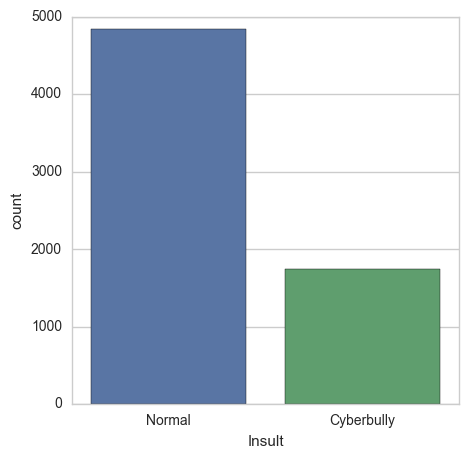

In [56]:
# Visualize number of Bully and Non-Bully comments

fig, (axis1) = plt.subplots(1,1,figsize=(5,5))

sns.countplot(x='Insult', data=df, ax=axis1)
axis1.set_xticklabels(["Normal","Cyberbully"], rotation=0)

In [57]:
# Function to count unique number of words and their occurrences
# This is followed by sorting them in descending order
import operator

def countUniqueWords(df):
    
    # Create a dictionary
    unique_words = {}

    # Iterate comment by comment
    for comment in df['Comment']:

        # Iterate word by word in comment
        for word in comment.split():

            # If word exists, else add it in
            if word in unique_words.keys():
                unique_words[word] += 1
            else:
                unique_words[word] = 1
                
    # Sort them in Descending order
    unique_words_sorted = sorted(unique_words.items(), key=operator.itemgetter(1), reverse = True)
    
    return unique_words_sorted

In [58]:
# Get two lists: All comments and Cyberbully comments
cyberbully_df = df[df.Insult == 1]
cyberbully_df.reset_index(inplace=True, drop=True)

non_cyberbully_df = df[df.Insult == 0]
non_cyberbully_df.reset_index(inplace=True, drop=True)

# Get the words and their count
non_cyberbully_list = countUniqueWords(non_cyberbully_df)
cyberbully_list = countUniqueWords(cyberbully_df)

print(len(non_cyberbully_list))
print(len(cyberbully_list))

17163
6430


In [59]:
# What is the maximum/minimum number of words from ALL comments and Cyberbully comments
# First: Create a function that returns max/min number of words from a list of comments
# Second: Return the index of that comment and view in dataframe (JUST IN CASE)

def maxWords(df):
    
    max_words = 0
    index = 0
    
    for i, comment in enumerate(df['Comment']):
        
        if len(comment.split()) > max_words:
            max_words = len(comment.split())
            index = i
    
    return max_words, index

def minWords(df):
    
    # Random value
    min_words = 1000
    index = 0
    
    for i, comment in enumerate(df['Comment']):
        
        if len(comment.split()) < min_words:
            min_words = len(comment.split())
            index = i
            
    return min_words, index

In [60]:
# Get the max and the index of the max
non_cyberbully_comments_max = maxWords(non_cyberbully_df)
cyberbully_comments_max = maxWords(cyberbully_df)

# Get the min and the index of the min
non_cyberbully_comments_min = minWords(non_cyberbully_df)
cyberbully_comments_min = minWords(cyberbully_df)

# Print them
print("Full Dataset(MAX): ",non_cyberbully_comments_max)
print("Full Dataset(MIN): ",non_cyberbully_comments_min)
print("======================================")
print("Cyberbully set(MAX): ",cyberbully_comments_max)
print("Cyberbully set(MIN): ",cyberbully_comments_min)

Full Dataset(MAX):  (2277, 1486)
Full Dataset(MIN):  (1, 444)
Cyberbully set(MAX):  (730, 850)
Cyberbully set(MIN):  (1, 12)


In [68]:
# View those comments
print(non_cyberbully_df['Comment'][444])

twss


In [62]:
# Get the average length of words from ALL comments and Cyberbully comments
# First: Create a function that totals all the words
# Second: Average the total by length of respective dataframe

def averageWords(df):
    
    total_comments = len(df)
    total_words = 0
    
    for comment in df['Comment']:
        
        total_words += len(comment.split())
        
    return round(total_words/total_comments)

In [63]:
# Get the averages and print them
non_cyberbully_comments_avg = averageWords(non_cyberbully_df)
cyberbully_comments_avg = averageWords(cyberbully_df)

print("AVERAGE SENTENCE LENGTH(ALL): ",non_cyberbully_comments_avg)
print("AVERAGE SENTENCE LENGTH(CYBERBULLY): ",cyberbully_comments_avg)

AVERAGE SENTENCE LENGTH(ALL):  36
AVERAGE SENTENCE LENGTH(CYBERBULLY):  27


In [64]:
# Count how many sentences are more than the average
# First: Create a function that takes in respective dataframe
# Second: Count comments that are MORE than the average

def moreThanAverage(df, avg):
    
    count = 0
    
    for comment in df['Comment']:
        
        if len(comment.split()) > avg:
            count += 1
            
    return count

In [72]:
# Get the counts
non_cyberbully_avg_counts = moreThanAverage(non_cyberbully_df, 500)
cyberbully_avg_counts = moreThanAverage(cyberbully_df, 500)

# Print them 
print("All comments: %d/%d" % (non_cyberbully_avg_counts, len(non_cyberbully_df)))
print("Cyberbully comments: %d/%d" % (cyberbully_avg_counts, len(cyberbully_df)))

All comments: 15/4838
Cyberbully comments: 1/1742
